# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

## EDA & Data Preprocessing

### Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Mini Project And VIX/Mini Project/Mini Project 5/dataset/CSV/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
df.head()

Mounted at /content/drive


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


### Descriptive Statistic

In [2]:
# melihat informasi dasar dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [3]:
# mengelompokan data
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=('int64', 'float64')).columns.tolist()

In [4]:
# melihat statistika dasar dataframe
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [5]:
df[categorical].describe()

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


### Univariate Analysis

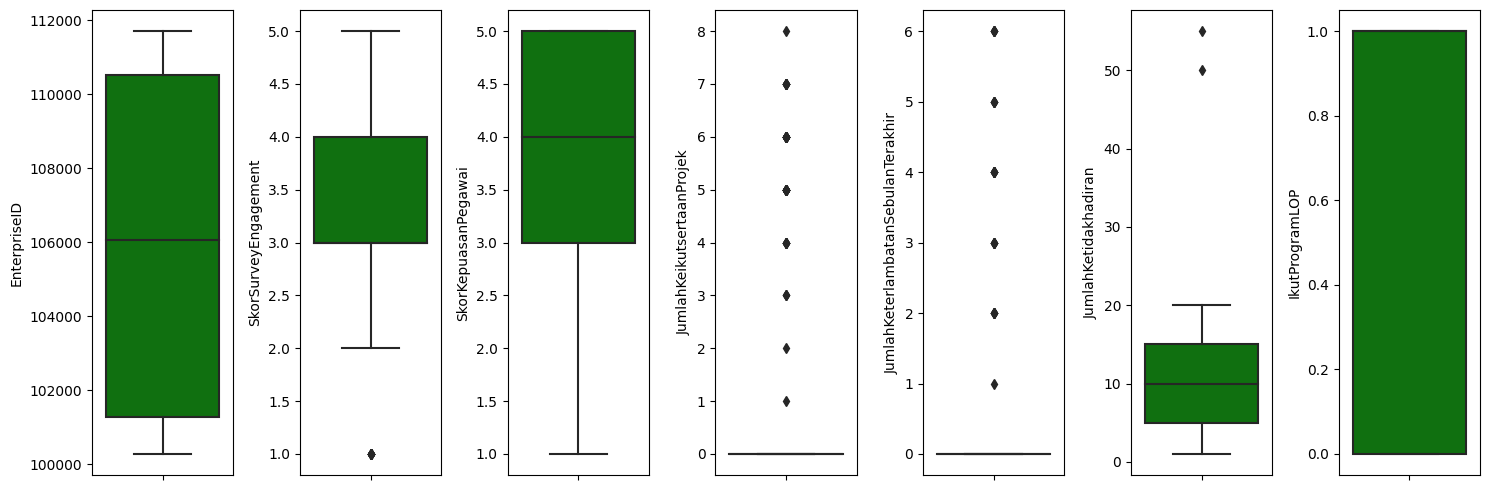

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Mencari outliers
features = numerical

for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient = 'v')
  plt.tight_layout()

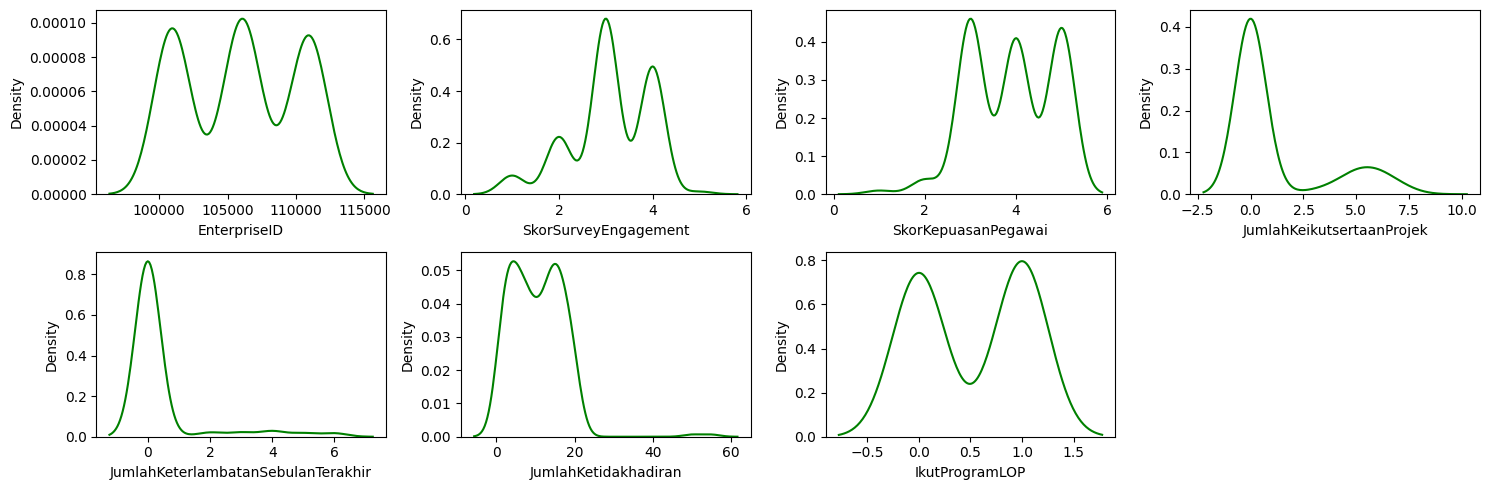

In [7]:
# melihat sebaran data

plt.figure(figsize=(15, 5))

for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='green')
  plt.xlabel(features[i])
  plt.tight_layout()

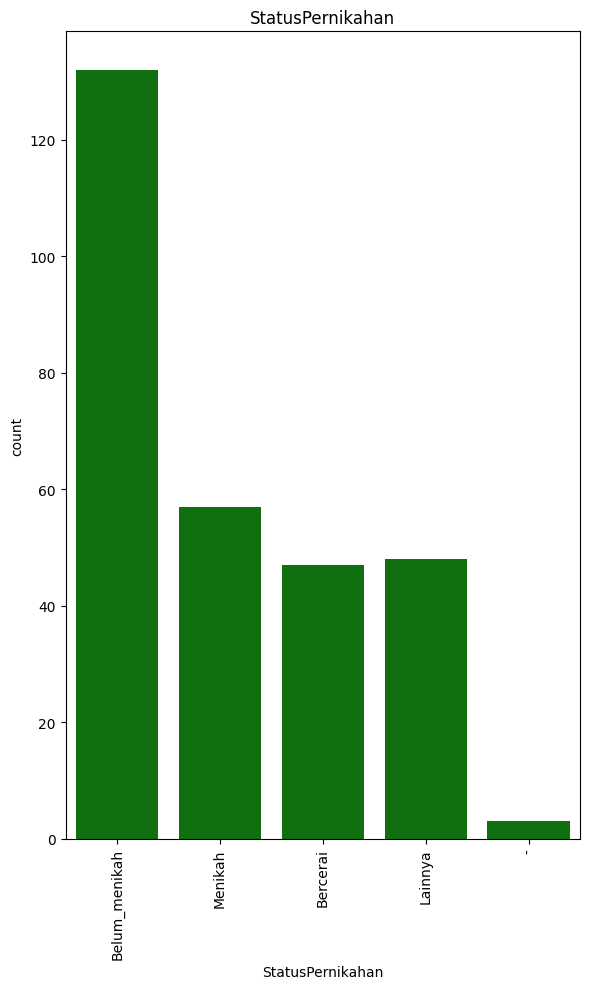

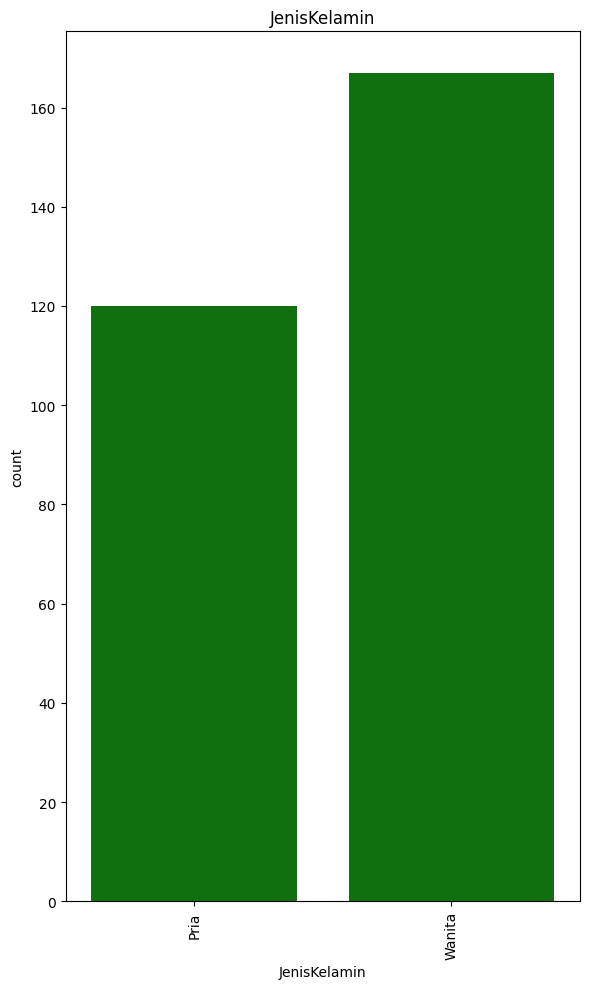

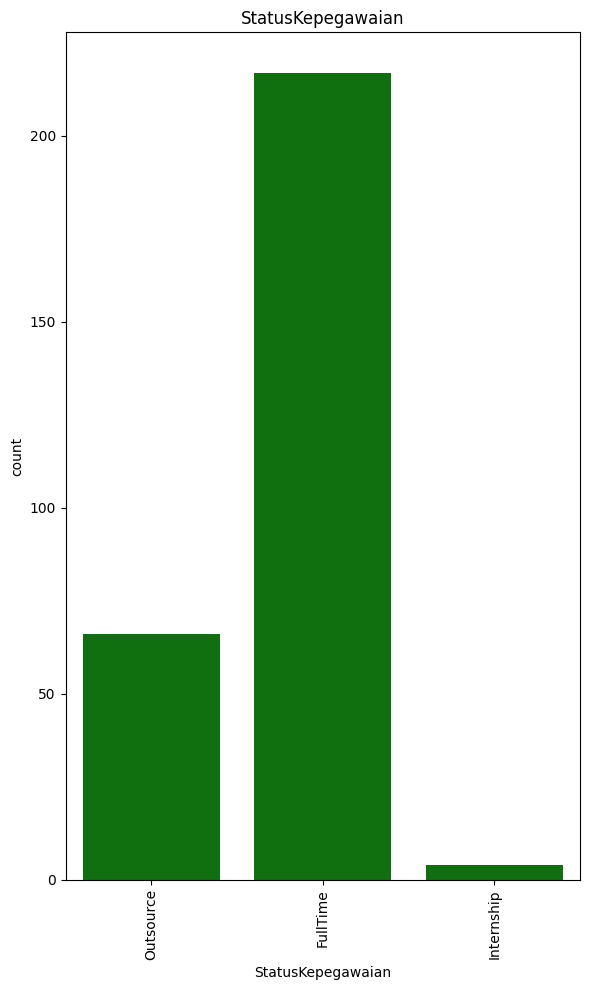

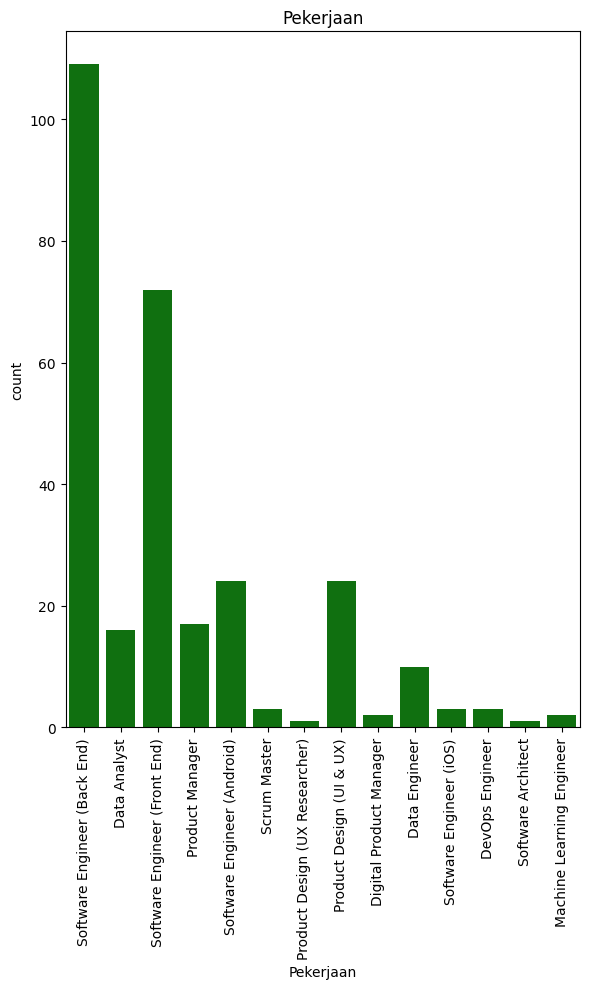

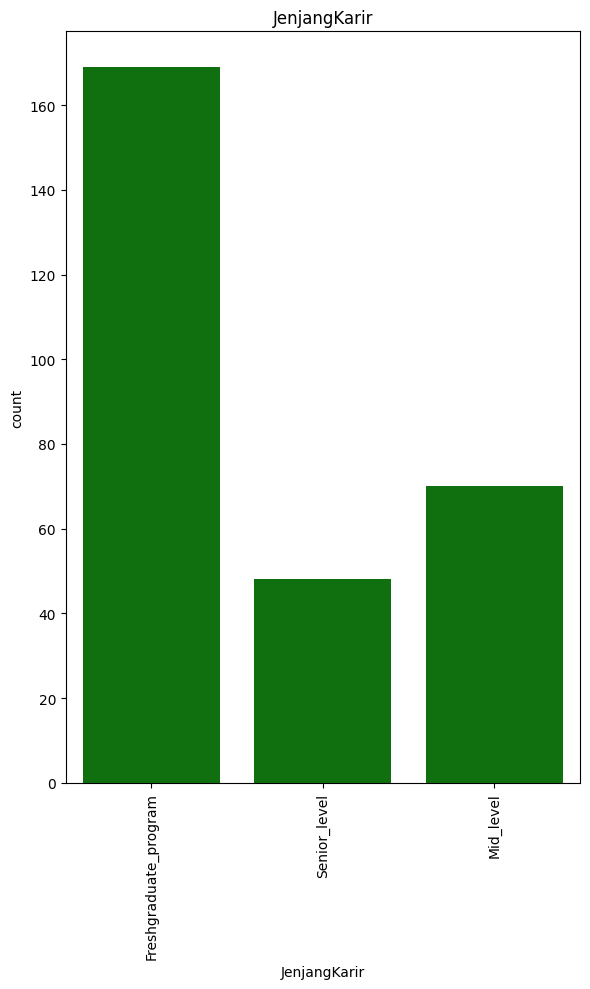

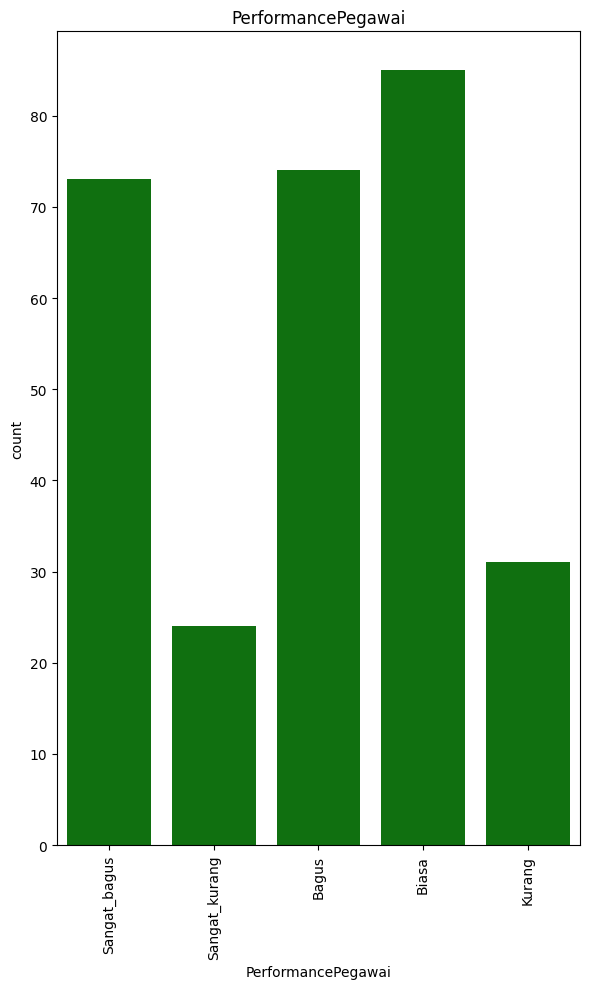

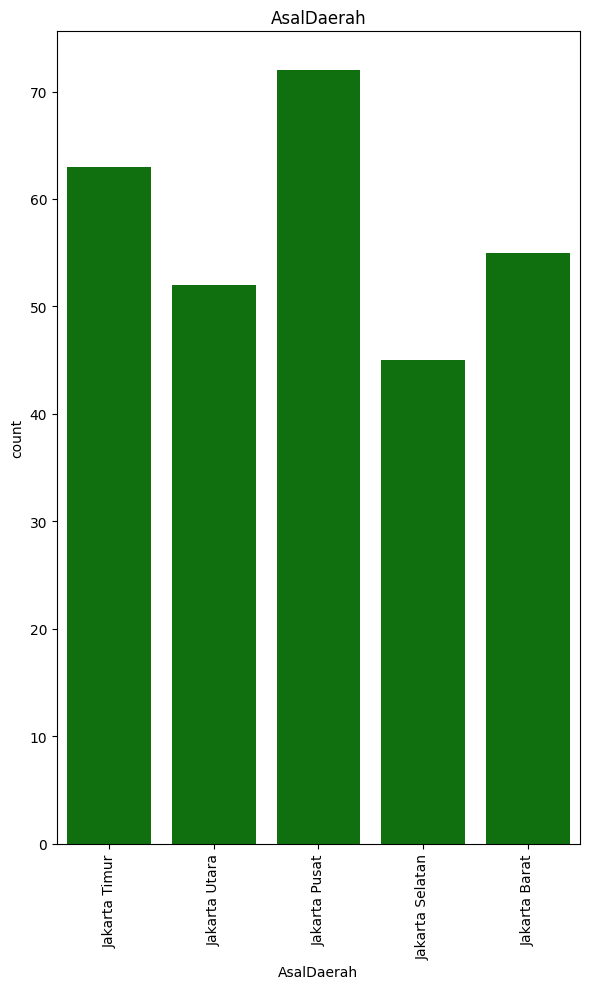

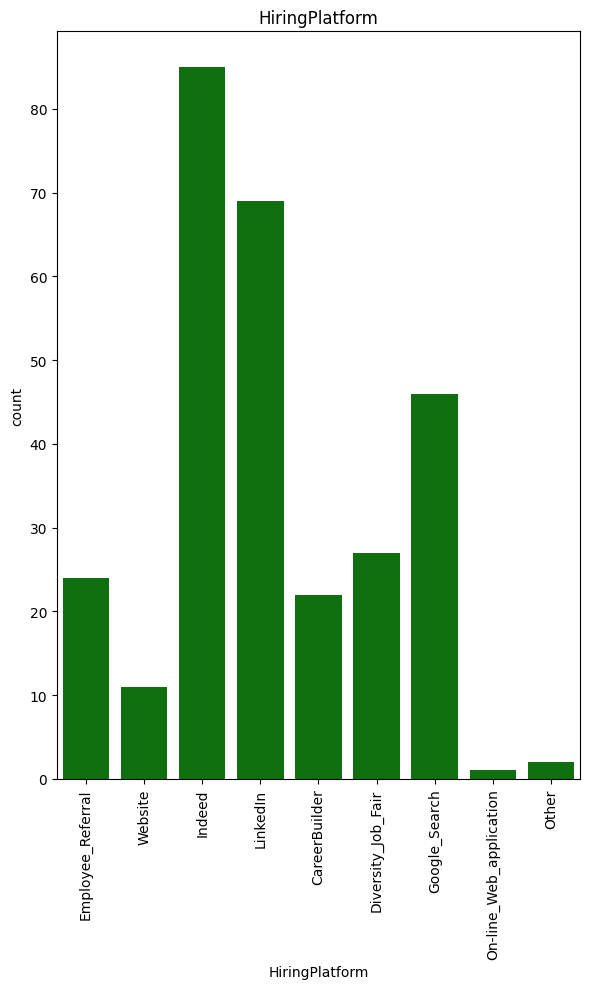

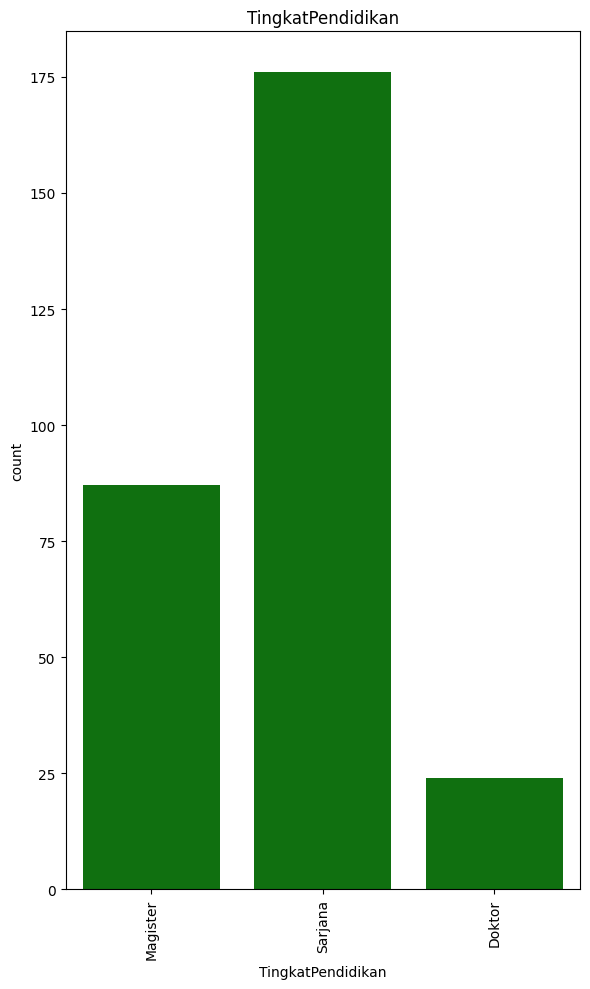

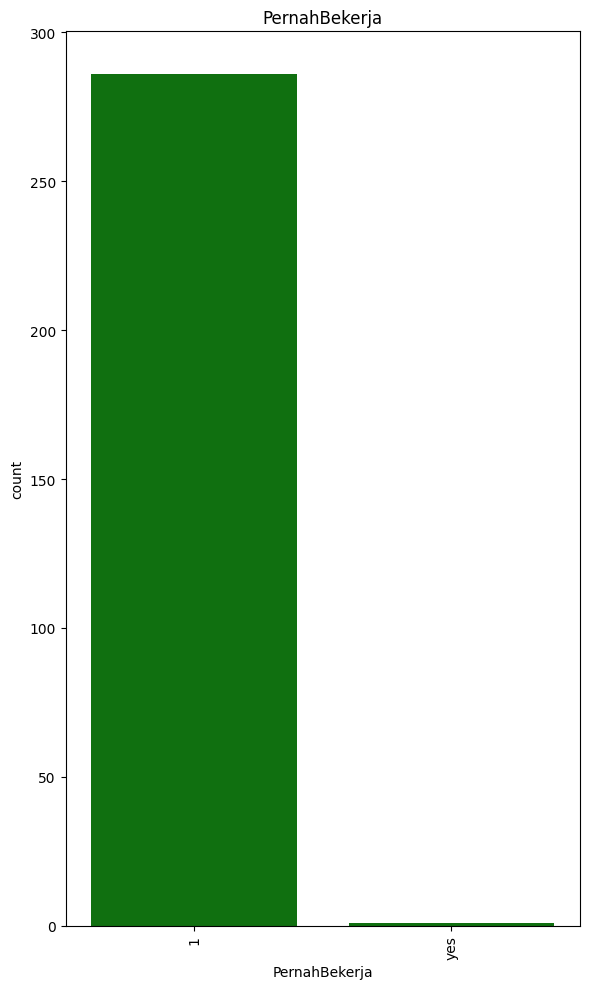

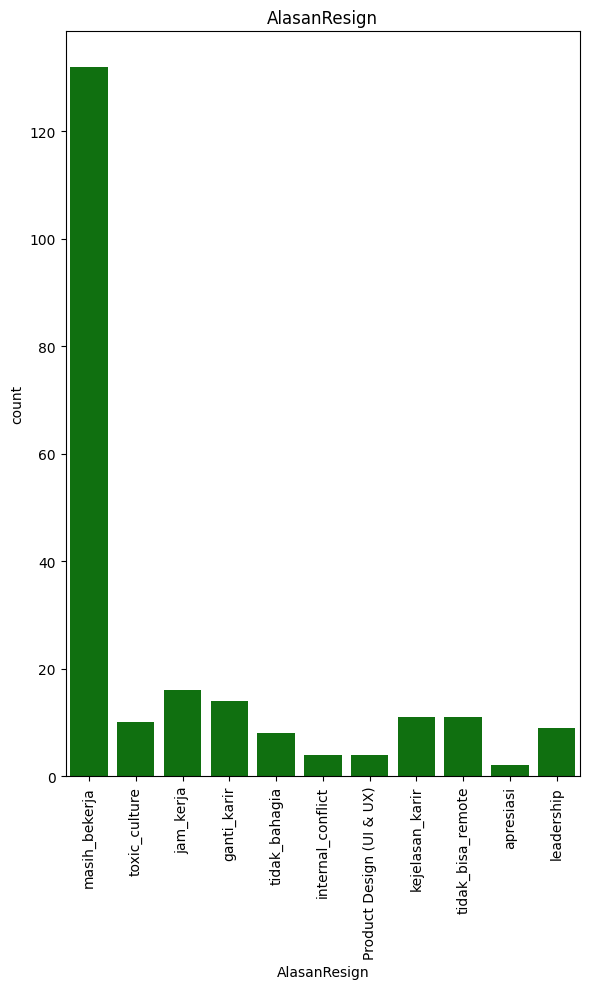

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

categoricals = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
                'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']

# Menentukan ukuran gambar
figure_height = 10  # Sesuaikan dengan preferensi Anda
figure_width = 6   # Sesuaikan dengan preferensi Anda

for feature in categoricals:
    plt.figure(figsize=(figure_width, figure_height))
    sns.countplot(x=df[feature], color='green')
    plt.title(feature)  # Menambahkan judul pada plot
    plt.xticks(rotation=90)  # Memiringkan label sumbu x untuk lebih baik
    plt.tight_layout()
    plt.show()

### Multivariate Analysis

<ipython-input-9-4569773a42e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

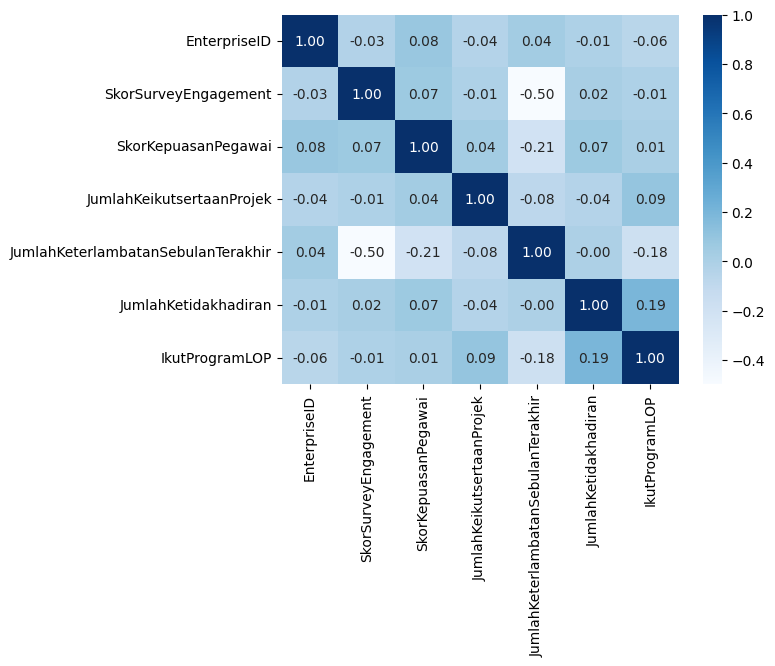

In [9]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Handling Missing Values

In [10]:
# mengecek data null
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [11]:
# mengatasi data null

# menggunakan median karena kolom memiliki indikasi skewd
df['SkorKepuasanPegawai']=df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median())
df['JumlahKeikutsertaanProjek']=df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median())
df['JumlahKeterlambatanSebulanTerakhir']=df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median())
df['JumlahKetidakhadiran']=df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median())

# menggunakan mode dikarenakan kolom categorical dan nilai kosong pada kolom ini memiliki nilai (-) pada kolom TanggalResign, sehingga mengidentifikasikan nilai kosomg pada kolom ini berstatus masih bekerja
df['AlasanResign']=df['AlasanResign'].fillna(df['AlasanResign'].mode()[0])

# kolom IkutProgramLOP di drop karena berisi terlalu banyak missing values
df.drop('IkutProgramLOP', axis=1, inplace=True)

df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

### Mengganti value yang tidak sesuai

In [12]:
print(df['PernahBekerja'].unique())
print(df['StatusPernikahan'].unique())
print(df['AlasanResign'].unique())

['1' 'yes']
['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-']
['masih_bekerja' 'toxic_culture' 'jam_kerja' 'ganti_karir' 'tidak_bahagia'
 'internal_conflict' 'Product Design (UI & UX)' 'kejelasan_karir'
 'tidak_bisa_remote' 'apresiasi' 'leadership']


In [13]:
import statistics

# Mengganti data yang tidak sesuai pada kolom PernahBekerja
df['PernahBekerja'] = df['PernahBekerja'].replace('yes', '1')

# Mengganti data yang tidak sesuai pada kolom StatusPernikahan
# Menghitung mode tanpa baris yang berinilai '-'
mode_values = df['StatusPernikahan'][df['StatusPernikahan'] != '-']
mode_value = statistics.mode(mode_values)
# Mengganti nilai '-' dengan mode
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', mode_value)

# Mengganti data yang tidak sesuai pada kolom AlasanResign
# Menghitung mode tanpa baris yang berinilai 'Product Design (UI & UX)'
mode_values2 = df['AlasanResign'][df['AlasanResign'] != 'Product Design (UI & UX)']
mode_value2 = statistics.mode(mode_values2)
# Mengganti nilai '-' dengan mode
df['AlasanResign'] = df['AlasanResign'].replace('Product Design (UI & UX)', mode_value2)



In [14]:
print(df['PernahBekerja'].unique())
print(df['StatusPernikahan'].unique())
print(df['AlasanResign'].unique())

['1']
['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya']
['masih_bekerja' 'toxic_culture' 'jam_kerja' 'ganti_karir' 'tidak_bahagia'
 'internal_conflict' 'kejelasan_karir' 'tidak_bisa_remote' 'apresiasi'
 'leadership']


### Membuang data yang memiliki satu nilai unique

In [15]:
jumlah_unik = df.nunique()

print(jumlah_unik)

Username                              285
EnterpriseID                          287
StatusPernikahan                        4
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           1
AlasanResign                           10
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan              127
TanggalResign                     

In [16]:
df.drop('PernahBekerja', axis = 1, inplace = True)

## Annual Report on Employee Number Changes

### Membuat Tabel Agregat

In [17]:
# Konversi kolom TanggalResign dan TahunResign kemudian diambil tahunnya
df['TahunHiring'] = pd.to_datetime(df['TanggalHiring']).dt.year
df['TahunResign'] = df['TanggalResign'].apply(lambda x: pd.to_datetime(x, errors='coerce').year if x != '-' else None)
df['TahunResign'] = df['TahunResign'].astype(float).astype(pd.Int64Dtype())
df.head()


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,<NA>
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,<NA>
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018


### Join Tabel Agregat

In [18]:
# Membuat kolom agregasi berdasarkan tahun hiring dan tahun resign
df_hiring = df.groupby('TahunHiring').agg({'Username': 'count'}).reset_index()
df_resign = df.groupby('TahunResign').agg({'Username': 'count'}).reset_index()

In [19]:
df_merge = pd.merge(df_hiring, df_resign, left_on='TahunHiring', right_on='TahunResign', how='outer')
df_merge

,TahunHiring,Username_x,TahunResign,Username_y
0,2006.0,1.0,<NA>,NaN
1,2007.0,2.0,<NA>,NaN
2,2008.0,2.0,<NA>,NaN
3,2009.0,7.0,<NA>,NaN
4,2010.0,8.0,<NA>,NaN
5,2011.0,76.0,<NA>,NaN
6,2012.0,41.0,<NA>,NaN
7,2013.0,43.0,2013,5.0
8,2014.0,56.0,2014,12.0
9,2015.0,31.0,2015,8.0


### Imputation Nilai Kosong dan Modifikasi Tabel

In [20]:
# Menambahkan nilai tahun yang semua kosong pada kolom TahunHiring
df_merge.iloc[-2:, df_merge.columns.get_loc('TahunHiring')] = [2019, 2020]

# menghapus kolom TahunResign
df_merge = df_merge.drop(columns=['TahunResign'])

# Mengubah nama-nama kolom
df_merge.columns = ['Tahun', 'Jumlah_Karyawan_Masuk', 'Jumlah_Karyawan_Resign' ]

# Mengisi nilai NaN menjadi 0
df_merge = df_merge.fillna(0)

# Mengubah tipe data df_merge
df_merge['Tahun'] = df_merge['Tahun'].astype(int)
df_merge['Jumlah_Karyawan_Masuk'] = df_merge['Jumlah_Karyawan_Masuk'].astype(int)
df_merge['Jumlah_Karyawan_Resign'] = df_merge['Jumlah_Karyawan_Resign'].astype(int)

df_merge

,Tahun,Jumlah_Karyawan_Masuk,Jumlah_Karyawan_Resign
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0
5,2011,76,0
6,2012,41,0
7,2013,43,5
8,2014,56,12
9,2015,31,8


### Jumlah Karyawan Resign, Masih Bertahan, dan Perubahan Jumlah Karyawan

In [21]:
df_merge['Total_Resign'] = df_merge['Jumlah_Karyawan_Resign']
df_merge['Total_Bertahan'] = df_merge['Jumlah_Karyawan_Masuk'] - df_merge['Jumlah_Karyawan_Resign']
df_merge['Perubahan'] = df_merge['Total_Bertahan'] - df_merge['Total_Resign']

df_merge

,Tahun,Jumlah_Karyawan_Masuk,Jumlah_Karyawan_Resign,Total_Resign,Total_Bertahan,Perubahan
0,2006,1,0,0,1,1
1,2007,2,0,0,2,2
2,2008,2,0,0,2,2
3,2009,7,0,0,7,7
4,2010,8,0,0,8,8
5,2011,76,0,0,76,76
6,2012,41,0,0,41,41
7,2013,43,5,5,38,33
8,2014,56,12,12,44,32
9,2015,31,8,8,23,15


### Visualisasi Perubahan Jumlah Karyawan

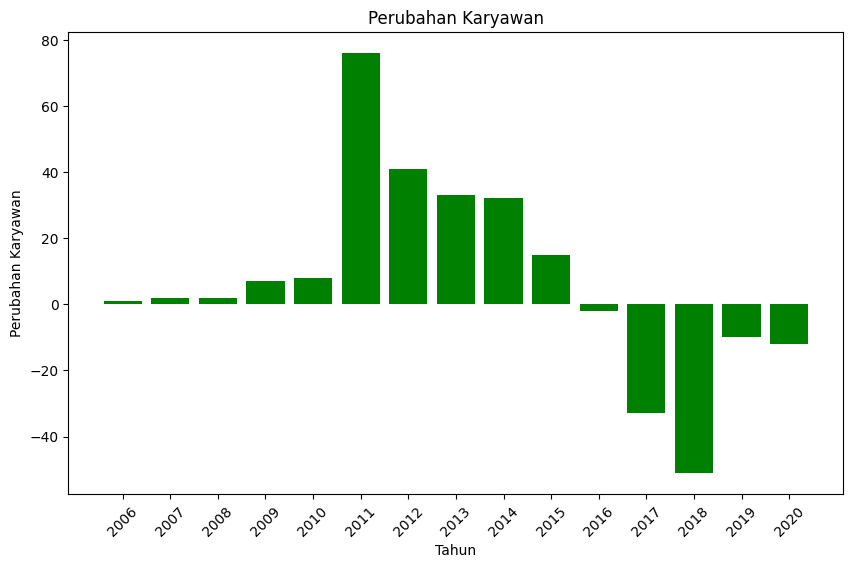

In [22]:
import matplotlib.pyplot as plt

# Sets the plot size
plt.figure(figsize=(10, 6))

# Make a plot of increase and decrease of employees
plt.bar(df_merge.index, df_merge['Perubahan'], color='green')

# Add x and y axis labels
plt.xlabel('Tahun')
plt.ylabel('Perubahan Karyawan')

# Added plot title
plt.title('Perubahan Karyawan')

# Sets the position and label on the x-axis
plt.xticks(df_merge.index, df_merge['Tahun'], rotation=45)

# Display plots
plt.show()

### Interpretasi

Dari hasil visualisasi menggunakan Waterfall Chart, terlihat bahwa penurunan jumlah karyawan dimulai pada tahun 2016. Analisis total perubahan per tahun didasarkan pada selisih antara jumlah karyawan yang bertahan dan jumlah karyawan yang mengundurkan diri. Pada tahun 2018, terjadi aktivitas perekrutan dan pengunduran diri yang paling signifikan, yang dapat dilihat dari arah negatif garis Waterfall Chart. Hal ini mengindikasikan situasi yang menunjukkan perusahaan dalam kondisi kurang menguntungkan, karena jumlah karyawan yang mengundurkan diri lebih banyak daripada jumlah karyawan yang bergabung atau bertahan.

Hasil ini mencerminkan pentingnya perbaikan manajemen sumber daya manusia perusahaan. Perusahaan perlu melakukan peningkatan untuk memastikan retensi karyawan yang lebih baik dan menghindari biaya tambahan yang terkait dengan proses rekrutmen yang terus-menerus.

## Resign Reason Analysis for Employee Attrition Management Strategy

### Membuat Tabel Agregat

In [23]:
df_not_resigned = df[df['TahunResign'].isnull()]
df_not_resigned_count = df_not_resigned.groupby('Pekerjaan').size().reset_index(name='jumlah_karyawan_aktif')
df_not_resigned_count

,Pekerjaan,jumlah_karyawan_aktif
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [24]:
df_resigned = df[df['TahunResign'].notnull()]
df_resigned_count = df_resigned.groupby('Pekerjaan').size().reset_index(name='jumlah_karyawan_resign')
df_resigned_count

,Pekerjaan,jumlah_karyawan_resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


### Join Tabel Agregat

In [25]:
df_merge2 = pd.merge(df_not_resigned_count, df_resigned_count, left_on='Pekerjaan', right_on='Pekerjaan', how='outer')
df_merge2

,Pekerjaan,jumlah_karyawan_aktif,jumlah_karyawan_resign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,NaN
3,Digital Product Manager,2,NaN
4,Machine Learning Engineer,2,NaN
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,NaN
7,Product Manager,11,6.0
8,Scrum Master,3,NaN
9,Software Architect,1,NaN


### Imputation Nilai Kosong dan Modifikasi Tabel

In [26]:
# Mengisi nilai NaN menjadi 0
df_merge2 = df_merge2.fillna(0)

# Mengubah tipe data df_merge
df_merge2['jumlah_karyawan_resign'] = df_merge2['jumlah_karyawan_resign'].astype(int)

# Membuat kolom total karyawan
df_merge2['Total_karyawan'] = df_merge2['jumlah_karyawan_aktif'] + df_merge2['jumlah_karyawan_resign']

# Persentase jumlah karyawan aktif
df_merge2['Persentase_karyawan_aktif'] = (df_merge2['jumlah_karyawan_aktif'] / df_merge2['Total_karyawan']) * 100

df_merge2

,Pekerjaan,jumlah_karyawan_aktif,jumlah_karyawan_resign,Total_karyawan,Persentase_karyawan_aktif
0,Data Analyst,8,8,16,50.000000
1,Data Engineer,7,3,10,70.000000
2,DevOps Engineer,3,0,3,100.000000
3,Digital Product Manager,2,0,2,100.000000
4,Machine Learning Engineer,2,0,2,100.000000
5,Product Design (UI & UX),15,9,24,62.500000
6,Product Design (UX Researcher),1,0,1,100.000000
7,Product Manager,11,6,17,64.705882
8,Scrum Master,3,0,3,100.000000
9,Software Architect,1,0,1,100.000000


### Visualisasi Persentase Karyawan Aktif

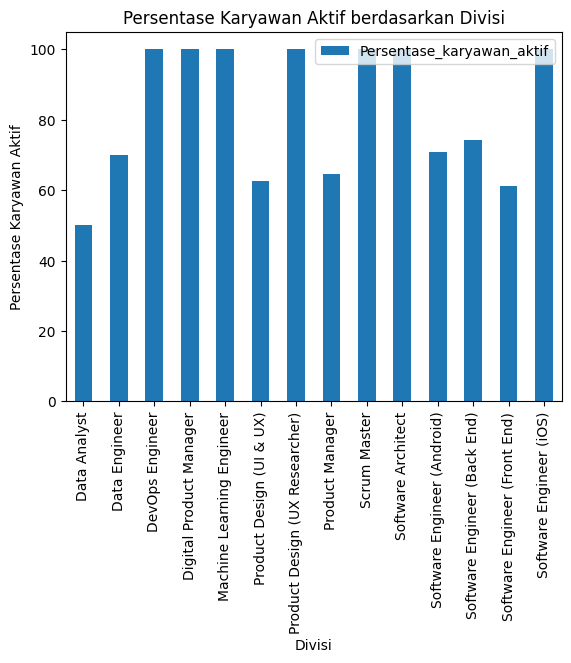

In [27]:
df_merge2.plot(kind='bar', x='Pekerjaan', y='Persentase_karyawan_aktif')
plt.xlabel('Divisi')
plt.ylabel('Persentase Karyawan Aktif')
plt.xticks(rotation=90)
plt.title('Persentase Karyawan Aktif berdasarkan Divisi')
plt.show()

### Membuat Tabel Agregat Resign Berdasarkan Divisi, Jenjang Karir, Performa Karyawan, dan Alasan Resign

In [28]:
df_resign_agg = df_resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Total_resign')
df_resign_agg

,JenjangKarir,PerformancePegawai,AlasanResign,Total_resign
0,Freshgraduate_program,Bagus,ganti_karir,3
1,Freshgraduate_program,Bagus,jam_kerja,3
2,Freshgraduate_program,Bagus,kejelasan_karir,1
3,Freshgraduate_program,Bagus,leadership,2
4,Freshgraduate_program,Bagus,tidak_bisa_remote,1
5,Freshgraduate_program,Bagus,toxic_culture,2
6,Freshgraduate_program,Biasa,apresiasi,1
7,Freshgraduate_program,Biasa,ganti_karir,3
8,Freshgraduate_program,Biasa,internal_conflict,1
9,Freshgraduate_program,Biasa,jam_kerja,2


### Visualisasi Resign Berdasarkan Divisi, Jenjang Karir, Performa Karyawan, dan Alasan Resign

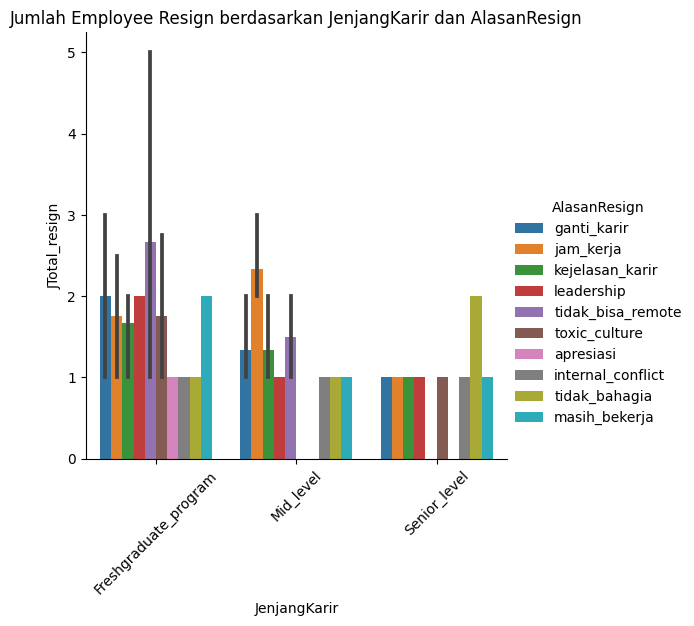

In [29]:
sns.catplot(data=df_resign_agg.reset_index(), x='JenjangKarir', y='Total_resign', hue='AlasanResign', kind='bar')
plt.xlabel('JenjangKarir')
plt.ylabel('JTotal_resign')
plt.title('Jumlah Employee Resign berdasarkan JenjangKarir dan AlasanResign')
plt.xticks(rotation=45)
plt.show()

### Interpretasi

Hasil pengamatan dan analisis grafik mengungkapkan beberapa pola yang signifikan dalam tingkat resignasi karyawan pada tiga tingkatan berbeda: Fresh Graduate, Middle Level, dan Senior. Pada tingkat Fresh Graduate, mayoritas karyawan mengundurkan diri disebabkan oleh ketidakmampuan melakukan pekerjaan dari jarak jauh (remote). Pada tingkat Middle Level, alasan utama resign adalah jam kerja yang terlalu padat. Sedangkan pada tingkat Senior, faktor utama adalah ketidakbahagiaan dalam pekerjaan.

Untuk mengatasi tantangan ini, kami merekomendasikan langkah-langkah strategis sebagai berikut:

1. Pada level Fresh Graduate disarankan untuk memberikan peluang kepada karyawan tingkat Fresh Graduate untuk mengadopsi model kerja jarak jauh (remote work) atau menerapkan pola kerja hybrid. Sebagai contoh, pola kerja hybrid ini dapat mencakup tiga hari kerja dari kantor dan dua hari kerja dari lingkungan rumah. Keputusan ini mendorong peningkatan fleksibilitas dalam lingkungan kerja, memungkinkan para Fresh Graduate untuk mengejar karir mereka sambil menjaga keseimbangan antara kehidupan kerja dan kehidupan pribadi. Dengan pendekatan ini, perusahaan memberikan peluang bagi karyawan muda ini untuk berkembang dan berkontribusi secara efisien sambil tetap memperhatikan kesejahteraan mereka.

2. Pada level Middle dalam kasus di mana alasan utama pengunduran diri berkaitan dengan beban kerja yang berlebihan, perusahaan memiliki kesempatan untuk mengambil tindakan proaktif. Salah satu langkah yang dapat dipertimbangkan adalah peningkatan jumlah karyawan di tim atau departemen terkait. Dengan demikian, perusahaan dapat mencapai distribusi beban kerja yang lebih merata, mengurangi tekanan yang ditanggung oleh individu, dan secara signifikan meningkatkan tingkat produktivitas. Langkah-langkah ini mencerminkan komitmen perusahaan terhadap kesejahteraan karyawan dan upaya untuk menciptakan lingkungan kerja yang seimbang dan produktif.

3. Pada level senior, perusahaan harus memberikan perhatian yang lebih serius terhadap fasilitas dan program kesejahteraan karyawan. Ini mencakup implementasi program kesehatan, kegiatan kebugaran, inisiatif pengembangan pribadi, serta kesadaran terhadap keseimbangan antara pekerjaan dan kehidupan pribadi. Langkah-langkah ini akan menciptakan lingkungan kerja yang seimbang dan nyaman, yang pada gilirannya dapat secara signifikan meningkatkan tingkat kepuasan dan retensi karyawan.

## Build an Automated Resignation Behavior Prediction using Machine Learning

### Data Preprocessing

In [30]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,<NA>
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,<NA>
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018


#### Handling Missing Value

In [31]:
# mengecek data null
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                           0
TahunHiring                       

In [32]:
# Handling Missing Value
df['TahunResign'] = df['TahunResign'].fillna(0)

In [33]:
# mengecek data null
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
TahunHiring                           0
TahunResign                           0


In [34]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018


#### Handiling Duplicated Value

In [35]:
df.duplicated().sum()

0

#### Handling Outliers

In [36]:
# mengelompokan data
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=('int64', 'float64')).columns.tolist()

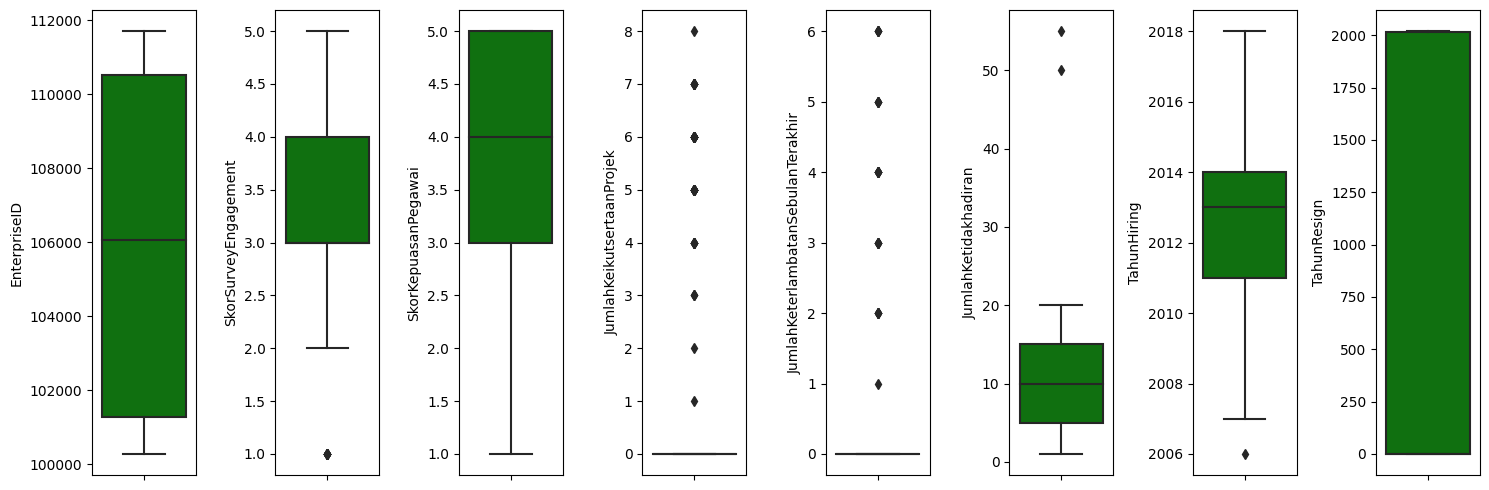

In [37]:
plt.figure(figsize=(15, 5))

# Mencari outliers
features = numerical

for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient = 'v')
  plt.tight_layout()

In [38]:
df.shape

(287, 25)

In [39]:
import numpy as np

# Handling Outliers
from scipy import stats

print(f'The number of rows before filtering out the outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['SkorSurveyEngagement', 'SkorKepuasanPegawai',
            'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
            'JumlahKetidakhadiran']:
    column_values = df[col].astype(float)
    column_values = column_values.fillna(column_values.mean())
    zscore = abs(stats.zscore(column_values))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]
print(f'Number of rows after filtering outliers: {len(df)}')



The number of rows before filtering out the outliers: 287
Number of rows after filtering outliers: 273


In [40]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018


#### Feature Engenering & Feature Encoding

##### Feature Engenering

In [41]:
# Membuat Kolom Baru

# Membuat kolom 'Resign' berdasarkan 'TahunResign'
df['Resign'] = df['TahunResign'].apply(lambda x: 'Resign' if x > 0 else 'Belum Resign')

# Buat kolom 'lama_bekerja' berdasarkan 'TahunResign' dan 'TahunHiring'
def hitung_lama_bekerja(row):
    if row['TahunResign'] == 0:
        return 2020 - row['TahunHiring']
    else:
        return row['TahunResign'] - row['TahunHiring']

df['lama_bekerja'] = df.apply(hitung_lama_bekerja, axis=1)


<ipython-input-41-4127b46e682b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resign'] = df['TahunResign'].apply(lambda x: 'Resign' if x > 0 else 'Belum Resign')
<ipython-input-41-4127b46e682b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lama_bekerja'] = df.apply(hitung_lama_bekerja, axis=1)


In [42]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign,lama_bekerja
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,0,Belum Resign,9
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018,Resign,4
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014,Resign,3
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,0,Belum Resign,6
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018,Resign,5


##### Feature Encoding

In [43]:
df_copy = df.copy()
df_copy.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign,lama_bekerja
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,0,Belum Resign,9
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018,Resign,4
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014,Resign,3
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,0,Belum Resign,6
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018,Resign,5


In [44]:
# Label encoding

mapping_StatusKepegawaian = { 'Internship' : 0, 'Outsource' : 1, 'FullTime' : 2 }
mapping_JenjangKarir = { 'Freshgraduate_program' : 0, 'Mid_level' : 1, 'Senior_level' : 2 }
mapping_TingkatPendidikan = { 'Sarjana' : 0, 'Magister' : 1, 'Doktor' : 2 }
mapping_PerformancePegawai = { 'Sangat_kurang' : 0, 'Kurang' : 1, 'Biasa' : 2, 'Bagus' : 3, 'Sangat_bagus' : 4 }
mapping_Resign = { 'Belum Resign' : 0, 'Resign' : 1}

df_copy['StatusKepegawaian'] = df_copy['StatusKepegawaian'].map(mapping_StatusKepegawaian)
df_copy['JenjangKarir'] = df_copy['JenjangKarir'].map(mapping_JenjangKarir)
df_copy['TingkatPendidikan'] = df_copy['TingkatPendidikan'].map(mapping_TingkatPendidikan)
df_copy['PerformancePegawai'] = df_copy['PerformancePegawai'].map(mapping_PerformancePegawai)
df_copy['Resign'] = df_copy['Resign'].map(mapping_Resign)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_copy['AlasanResign'] = label_encoder.fit_transform(df_copy['AlasanResign'])
df_copy['Pekerjaan'] = label_encoder.fit_transform(df_copy['Pekerjaan'])


In [45]:
df_copy.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign,lama_bekerja
0,spiritedPorpoise3,111065,Belum_menikah,Pria,1,11,0,4,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,1,6,1972-07-01,2011-01-10,2016-2-15,-,2011,0,0,9
1,jealousGelding2,106080,Belum_menikah,Pria,2,0,0,0,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,0,9,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018,1,4
2,pluckyMuesli3,106452,Menikah,Pria,2,12,0,3,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,1,3,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014,1,3
3,stressedTruffle1,106325,Belum_menikah,Pria,1,12,0,3,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,0,6,1979-11-24,2014-2-17,2020-02-04,-,2014,0,0,6
4,shyTermite7,111171,Belum_menikah,Wanita,2,7,0,3,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,0,1,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018,1,5


In [46]:
df_copy.shape

(273, 27)

<ipython-input-47-3ded6cf5af84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

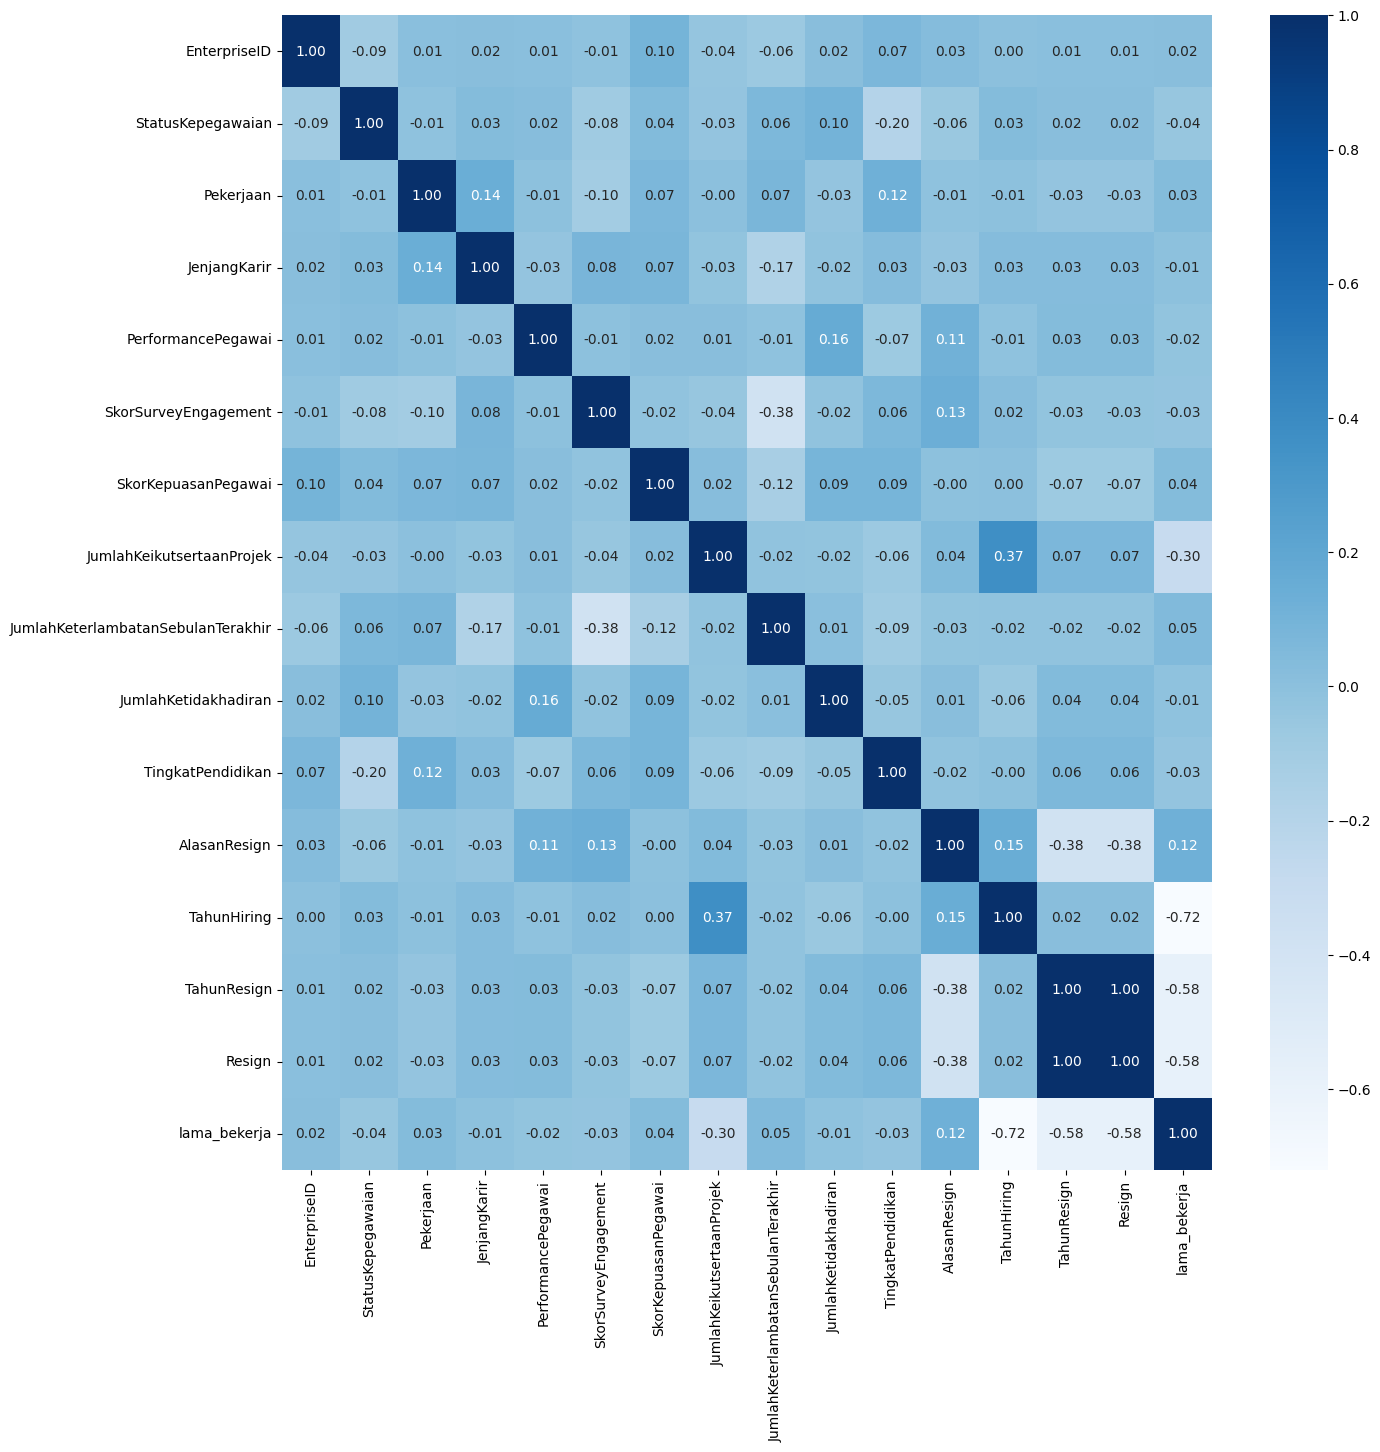

In [47]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_copy.corr(), cmap='Blues', annot=True, fmt='.2f')

In [48]:
df_copy = df_copy.drop(columns=['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'TahunHiring', 'TahunResign'   ])  # Menghapus kolom 'Kolom1' dan 'Kolom2'


In [49]:
df_copy.duplicated().sum()

0

In [50]:
df_copy.shape

(273, 13)

In [51]:
df_copy.head()

,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,Resign,lama_bekerja
0,1,11,0,4,4,4.0,0.0,0.0,9.0,1,6,0,9
1,2,0,0,0,4,4.0,4.0,0.0,3.0,0,9,1,4
2,2,12,0,3,4,3.0,0.0,0.0,11.0,1,3,1,3
3,1,12,0,3,3,3.0,0.0,4.0,6.0,0,6,0,6
4,2,7,0,3,3,3.0,0.0,0.0,11.0,0,1,1,5


In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 286
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusKepegawaian                   273 non-null    int64  
 1   Pekerjaan                           273 non-null    int64  
 2   JenjangKarir                        273 non-null    int64  
 3   PerformancePegawai                  273 non-null    int64  
 4   SkorSurveyEngagement                273 non-null    int64  
 5   SkorKepuasanPegawai                 273 non-null    float64
 6   JumlahKeikutsertaanProjek           273 non-null    float64
 7   JumlahKeterlambatanSebulanTerakhir  273 non-null    float64
 8   JumlahKetidakhadiran                273 non-null    float64
 9   TingkatPendidikan                   273 non-null    int64  
 10  AlasanResign                        273 non-null    int64  
 11  Resign                              273 non-n

#### Feature Transformation

In [53]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Kolom label yang ingin Anda pertahankan (dalam hal ini, 'Resign')
label_column = df_copy['Resign']

# Dapatkan daftar nama kolom dengan tipe data numerik
numerical_columns = df_copy.select_dtypes(include=['float', 'int']).columns

# Standarisasi kolom fitur numerik
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])

# Masukkan kembali kolom label
df_copy['Resign'] = label_column

# Tampilkan DataFrame setelah standarisasi
df_copy




,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,Resign,lama_bekerja
0,-1.642472,0.502140,-0.743174,1.234179,1.092609,0.060022,-0.526277,-0.261652,-0.192822,0.809040,0.253566,0,1.002889
1,0.544820,-2.483855,-0.743174,-2.052951,1.092609,0.060022,1.194366,-0.261652,-1.224987,-0.724765,2.075240,1,-0.844538
2,0.544820,0.773595,-0.743174,0.412396,1.092609,-1.110413,-0.526277,-0.261652,0.151233,0.809040,-1.568108,1,-1.214024
3,-1.642472,0.773595,-0.743174,0.412396,-0.209934,-1.110413,-0.526277,4.581123,-0.708905,-0.724765,0.253566,0,-0.105567
4,0.544820,-0.583676,-0.743174,0.412396,-0.209934,-1.110413,-0.526277,-0.261652,0.151233,-0.724765,-2.782557,1,-0.475053
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.544820,-2.212401,0.582882,0.412396,-1.512476,1.230457,-0.526277,-0.261652,1.011370,-0.724765,0.253566,0,1.002889
283,0.544820,-1.126584,-0.743174,-0.409386,1.092609,1.230457,-0.526277,-0.261652,0.151233,-0.724765,-1.568108,1,-0.844538
284,0.544820,0.773595,1.908937,-0.409386,-1.512476,1.230457,-0.526277,-0.261652,1.183398,-0.724765,-2.782557,1,-0.475053
285,0.544820,0.230686,0.582882,0.412396,1.092609,1.230457,-0.526277,-0.261652,1.699480,-0.724765,-0.960883,1,0.263918


### Split data and Handling Class Imbalance

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_copy.drop(columns=['Resign'])
y = df_copy['Resign']

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE untuk oversampling pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Proporsi data yang sudah seimbang
print(y_train_resampled.value_counts())

0    150
1    150
Name: Resign, dtype: int64


In [55]:
print(y_test.value_counts())

0    39
1    16
Name: Resign, dtype: int64


### Training Model

#### LogisticRegression

##### Training Model

In [56]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model LogisticRegression
model_LogisticRegression = LogisticRegression()

# Fit model
model_LogisticRegression.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Akurasi: 85.45%
Rata-rata Precision: 0.82
Rata-rata Recall: 0.84
Rata-rata F1-score: 0.83


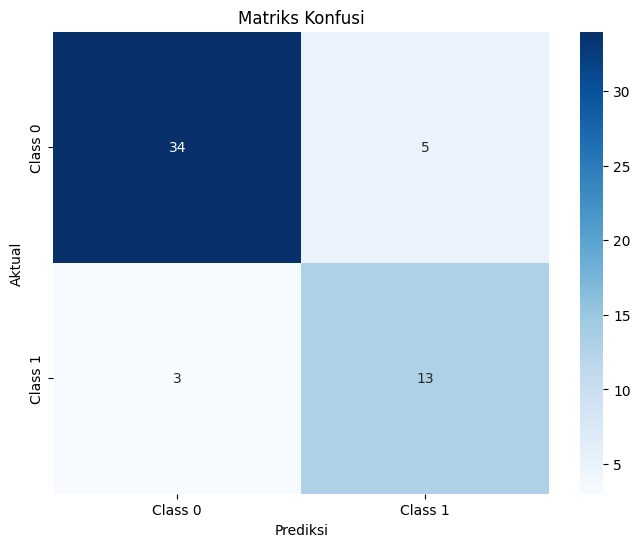

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_LogisticRegression.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

##### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Inisialisasi model LogisticRegression
model_LogisticRegression = LogisticRegression()

# Tentukan hyperparameter yang akan dieksplorasi
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000]
}

# Inisialisasi objek Randomized Search
random_search = RandomizedSearchCV(estimator=model_LogisticRegression, param_distributions=param_dist, n_iter=100, cv=5, scoring='precision', random_state=42, n_jobs=-1, error_score=0, verbose=2)

# Fitting model pada data latih yang sudah di-resampling
random_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik yang ditemukan
best_params = random_search.best_params_
print("Parameter terbaik:", best_params)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Parameter terbaik: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 

In [59]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model LogisticRegression
model_LogisticRegression_tuning = LogisticRegression(penalty = 'l1',
                                                     C = 0.1,
                                                     solver= 'saga',
                                                     max_iter = 100)

# Fit model
model_LogisticRegression_tuning.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

Akurasi: 87.27%
Rata-rata Precision: 0.84
Rata-rata Recall: 0.85
Rata-rata F1-score: 0.85


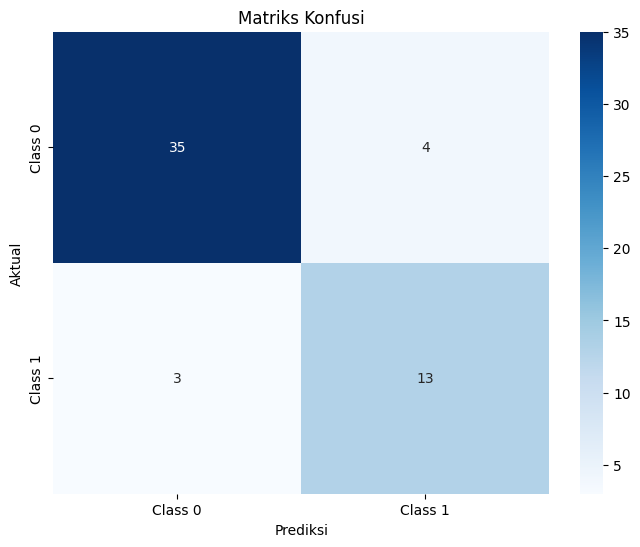

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_LogisticRegression_tuning.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

#### RandomForestClassifier

##### Training Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest untuk klasifikasi
model_rf_classification = RandomForestClassifier()

# Fit model
model_rf_classification.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

Akurasi: 94.55%
Rata-rata Precision: 0.96
Rata-rata Recall: 0.91
Rata-rata F1-score: 0.93


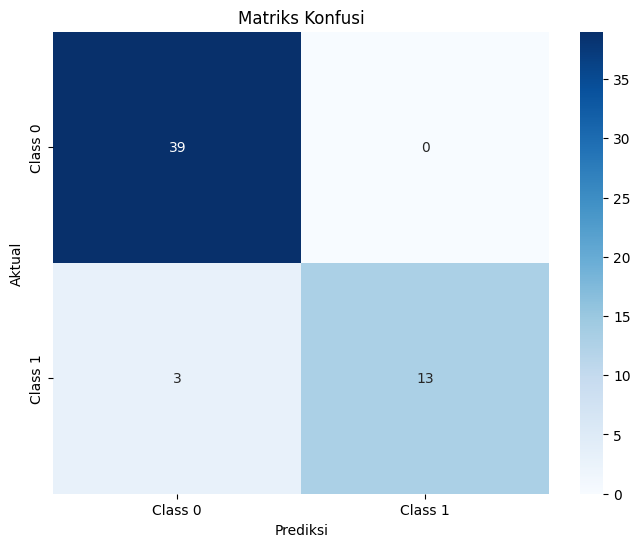

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_rf_classification.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

##### Hyperparameter Tuning

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi model RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Tentukan grid parameter yang akan dieksplorasi
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Inisialisasi objek Randomized Search
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='precision', random_state=42, n_jobs=-1, verbose=2)

# Fitting model pada data latih yang sudah di-resampling
random_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik yang ditemukan
best_params = random_search.best_params_
print("Parameter terbaik:", best_params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Parameter terbaik: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest untuk klasifikasi
model_rf_classification_tuning = RandomForestClassifier(n_estimators=300,
                                                        min_samples_split=2,
                                                        min_samples_leaf=2,
                                                        max_features='sqrt',
                                                        max_depth=30,
                                                        bootstrap=False,
                                                        random_state=42)

# Fit model
model_rf_classification_tuning.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       n_estimators=300, random_state=42)

Akurasi: 94.55%
Rata-rata Precision: 0.96
Rata-rata Recall: 0.91
Rata-rata F1-score: 0.93


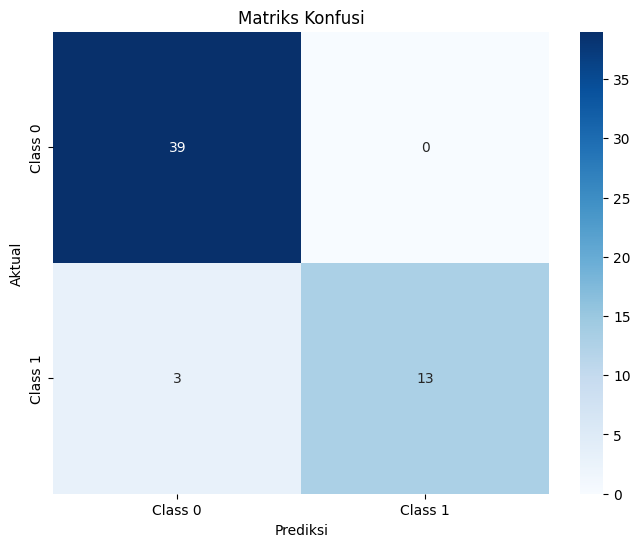

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_rf_classification_tuning.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()


#### DecisionTreeClassifier

##### Training Model

In [66]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree Classifier
model_dt_classification = DecisionTreeClassifier()

# Fit model pada data latih yang sudah di-resampling
model_dt_classification.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

Akurasi: 92.73%
Rata-rata Precision: 0.91
Rata-rata Recall: 0.91
Rata-rata F1-score: 0.91


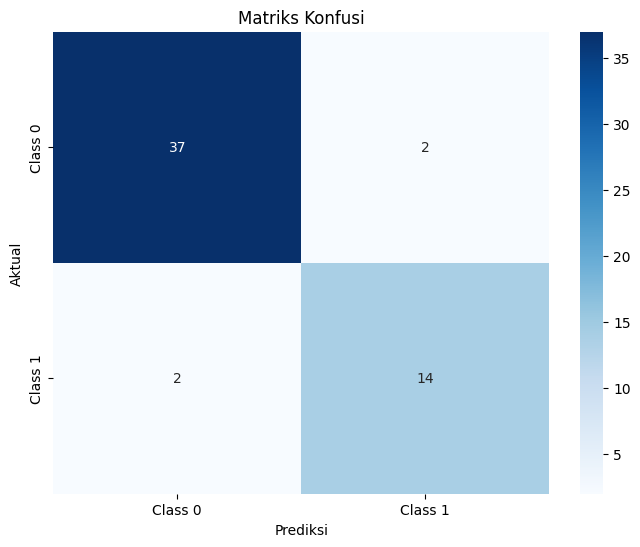

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_dt_classification.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

##### Hyperparameter Tuning

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi model Decision Tree Classifier
model_dt_classification = DecisionTreeClassifier(random_state=42)

# Tentukan grid parameter yang akan dieksplorasi
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inisialisasi objek Randomized Search untuk mencari parameter terbaik
random_search = RandomizedSearchCV(estimator=model_dt_classification, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fitting model pada data latih yang sudah di-resampling
random_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik yang ditemukan
best_params = random_search.best_params_
print("Parameter terbaik:", best_params)


Parameter terbaik: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy'}


In [69]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree Classifier
model_dt_classification_tuning = DecisionTreeClassifier(criterion = 'entropy',
                                                        splitter = 'best',
                                                        max_depth = 40,
                                                        min_samples_split = 5,
                                                        min_samples_leaf = 2,
                                                        max_features = None )

# Fit model pada data latih yang sudah di-resampling
model_dt_classification_tuning.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=2,
                       min_samples_split=5)

Akurasi: 92.73%
Rata-rata Precision: 0.91
Rata-rata Recall: 0.91
Rata-rata F1-score: 0.91


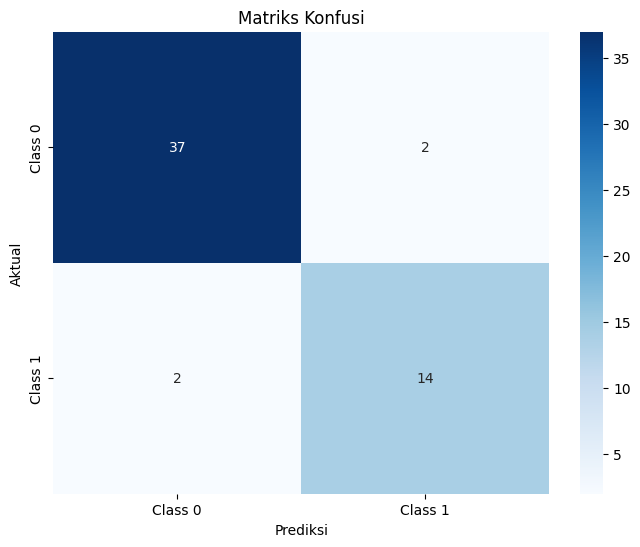

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_dt_classification_tuning.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()


#### GradientBoosting

##### Training Model

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting untuk klasifikasi
model_gb_classification = GradientBoostingClassifier()

# Fit model
model_gb_classification.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

Akurasi: 94.55%
Rata-rata Precision: 0.94
Rata-rata Recall: 0.92
Rata-rata F1-score: 0.93


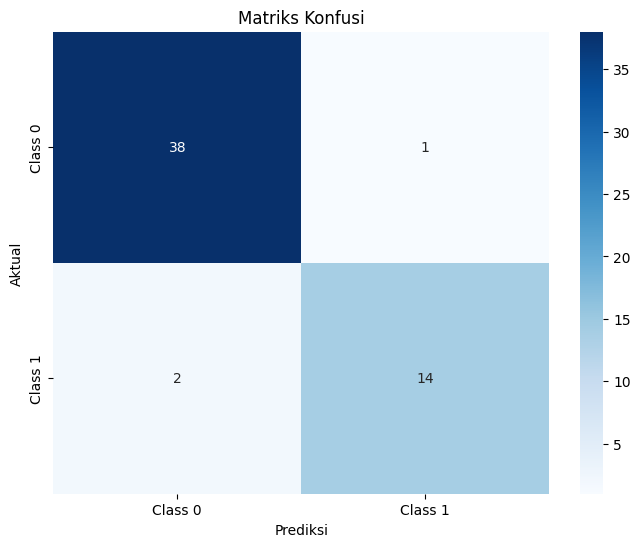

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_gb_classification.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

##### Hyperparameter Tuning

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi model Gradient Boosting Classifier
model_gb_classification = GradientBoostingClassifier(random_state=42)

# Tentukan grid parameter yang akan dieksplorasi
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi objek Randomized Search untuk mencari parameter terbaik
random_search = RandomizedSearchCV(estimator=model_gb_classification, param_distributions=param_dist, n_iter=100, cv=5, scoring='precision', random_state=42, n_jobs=-1, verbose=2)

# Fitting model pada data latih yang sudah di-resampling
random_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik yang ditemukan
best_params = random_search.best_params_
print("Parameter terbaik:", best_params)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Parameter terbaik: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting untuk klasifikasi
model_gb_classification_tuning = GradientBoostingClassifier(n_estimators=100,
                                                            subsample = 1.0,
                                                            min_samples_split = 2,
                                                            min_samples_leaf = 2,
                                                            max_features = 'auto',
                                                            learning_rate=0.01,
                                                            max_depth=3,
                                                            random_state=42)

# Fit model
model_gb_classification_tuning.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

GradientBoostingClassifier(learning_rate=0.01, max_features='auto',
                           min_samples_leaf=2, random_state=42)

Akurasi: 96.36%
Rata-rata Precision: 0.98
Rata-rata Recall: 0.94
Rata-rata F1-score: 0.95


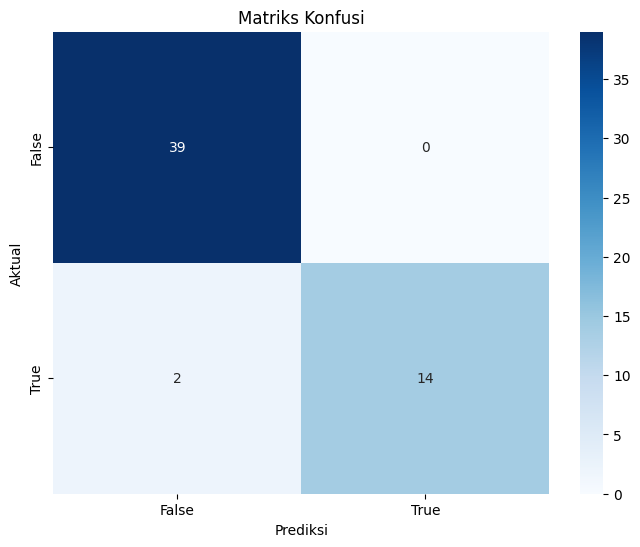

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_gb_classification_tuning.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

#### Pemilihan Model Terbaik

Alasan saya memilih model DecisionTree adalah seimbangnya nilai Precision dan Recall yang dihasilkan oleh model tersebut. Dalam konteks ini, seimbangnya nilai Precision dan Recall menunjukkan bahwa model DecisionTree memiliki kemampuan yang baik dalam mengidentifikasi karyawan yang tetap (kelas 0) dan karyawan yang keluar (kelas 1) dengan tingkat kesalahan yang cukup rendah.

Keputusan ini didasarkan pada pertimbangan bahwa seimbangnya Precision dan Recall dapat lebih meminimalkan risiko kesalahan yang dapat berdampak pada keputusan bisnis.


## Presenting Machine Learning Products to the Business Users


In [76]:
from sklearn.metrics import classification_report

# Prediksi hasil pada data pengujian
y_pred = model_dt_classification_tuning.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mendapatkan metrik evaluasi masing-masing kelas
class_names = [str(i) for i in range(len(report) - 3)]  # Mengganti ini sesuai dengan kelas yang sesuai

for class_name in class_names:
    precision = report[class_name]['precision']
    recall = report[class_name]['recall']
    f1_score = report[class_name]['f1-score']
    support = report[class_name]['support']

    print(f"Kelas {class_name}:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")
    print(f"Support: {support}")
    print("\n")


Kelas 0:
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Support: 39


Kelas 1:
Precision: 0.88
Recall: 0.88
F1-Score: 0.88
Support: 16




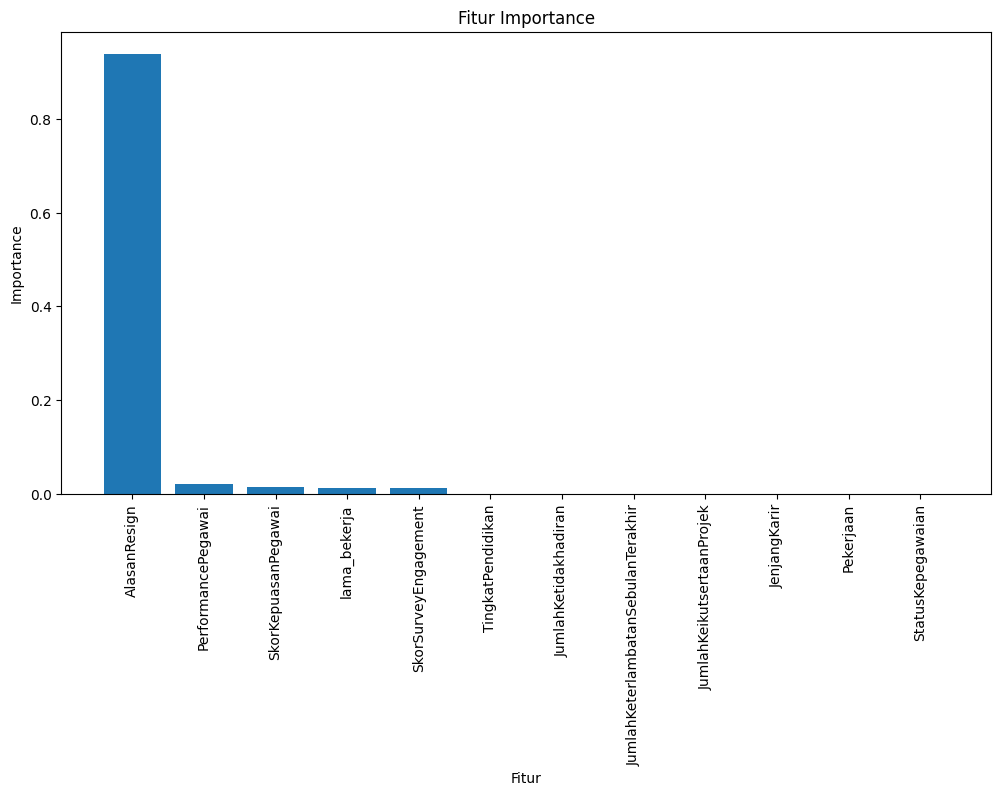

In [77]:
import matplotlib.pyplot as plt

# Mendapatkan nama fitur (kolom) dari data
feature_names2 = X.columns

# Mendapatkan tingkat penting dari fitur-fitur
importances2 = model_dt_classification_tuning.feature_importances_

# Mengurutkan fitur importance secara menurun
indices2 = importances2.argsort()[::-1]
sorted_feature_names2 = [feature_names2[i] for i in indices2]

# Membuat grafik batang fitur importance
plt.figure(figsize=(12, 6))
plt.title("Fitur Importance")
plt.bar(range(len(sorted_feature_names2)), importances2[indices2], align="center")
plt.xticks(range(len(sorted_feature_names2)), sorted_feature_names2, rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Importance")
plt.show()

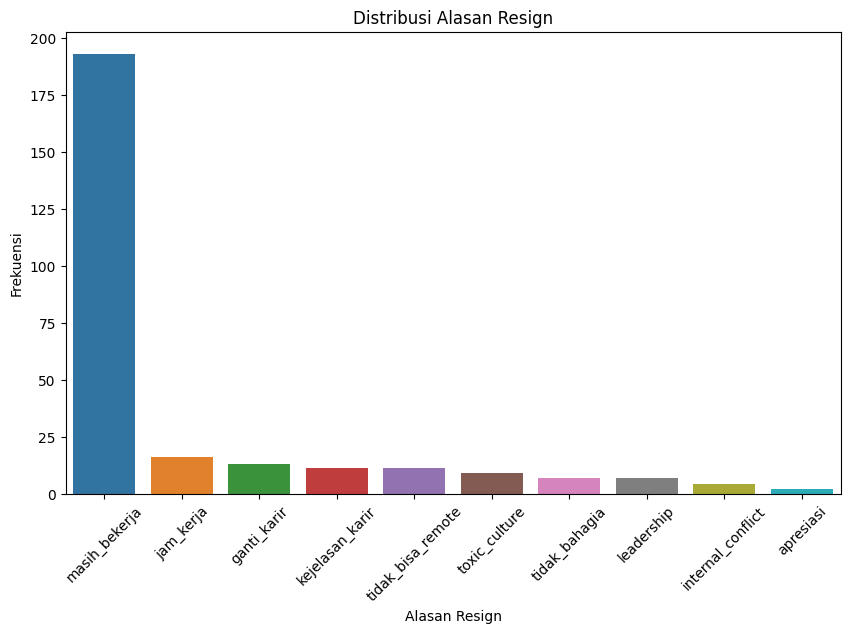

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of times each value in the column "Reason to Resign"
reason_counts = df['AlasanResign'].value_counts()

# Creating bar plots using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values)
plt.xlabel('Alasan Resign')
plt.ylabel('Frekuensi')
plt.title('Distribusi Alasan Resign')
plt.xticks(rotation=45)  # Set the x label rotation if needed
plt.show()